<a href="https://colab.research.google.com/github/chetan015/deep-learning/blob/master/Session_4_MNIST_DNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Libraries and modules**

In [2]:
# https://keras.io/
!pip install -q keras
import keras

Using TensorFlow backend.


In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add, BatchNormalization
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [4]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


(60000, 28, 28)


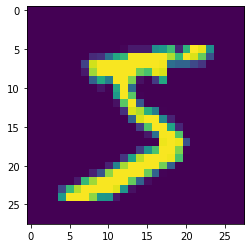

In [5]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [8]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [10]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [11]:
from keras.layers import Activation
model = Sequential()

 
# model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1)))
# model.add(Convolution2D(10, 1, activation='relu'))
# model.add(Convolution2D(10, 26))
# model.add(Flatten())
# model.add(Activation('softmax'))
# model.add(Convolution2D(16, 3, 3, activation='relu', input_shape=(28,28,1))) #26
# model.add(Convolution2D(32, 3, 3, activation='relu')) #24

# model.add(Convolution2D(16,1)) #24
# model.add(MaxPooling2D(pool_size=(2, 2))) #12

# model.add(Convolution2D(16, 3, 3, activation='relu')) #10
# model.add(Convolution2D(32, 3, 3, activation='relu')) #8

# model.add(Convolution2D(8,1)) #8
# model.add(MaxPooling2D(pool_size=(2, 2))) #4

# model.add(Convolution2D(16,3,3,activation='relu')) #2

# # Make the output 1,1,10
# model.add(Convolution2D(10, 2))
# Vanilla Network
model.add(Convolution2D(10, 3, 3, activation='relu', input_shape=(28,28,1))) #26

model.add(Convolution2D(10, 3, 3, activation='relu')) #24
model.add(Convolution2D(20, 3, 3, activation='relu')) #22

model.add(MaxPooling2D(pool_size=(2, 2))) #11
model.add(Convolution2D(10,1,1,activation='relu')) 

model.add(Convolution2D(10, 3, 3, activation='relu')) #9
model.add(Convolution2D(20, 3, 3, activation='relu')) #7

model.add(Convolution2D(10, 1, activation='relu')) #7
model.add(Convolution2D(10, 7))
model.add(Flatten())
model.add(Activation('softmax'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:27: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:29: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:30: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(20, (3, 3), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (1, 1), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:35: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:36: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(20, (3, 3), activatio

In [12]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 10)        100       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 10)        910       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 22, 22, 20)        1820      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 11, 11, 20)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 11, 11, 10)        210       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 9, 9, 10)          910       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 7, 7, 20)         

In [13]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [14]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.




Epoch 1/10





60000/60000 [==============================] - 24s 397us/step - loss: 0.2104 - acc: 0.9349
Epoch 2/10
60000/60000 [==============================] - 11s 180us/step - loss: 0.0742 - acc: 0.9764
Epoch 3/10
60000/60000 [==============================] - 11s 180us/step - loss: 0.0573 - acc: 0.9826
Epoch 4/10
60000/60000 [==============================] - 11s 180us/step - loss: 0.0478 - acc: 0.9853
Epoch 5/10
60000/60000 [==============================] - 11s 178us/step - loss: 0.0404 - acc: 0.9874
Epoch 6/10
60000/60000 [==============================] - 11s 178us/step - loss: 0.0362 - acc: 0.9889
Epoch 7/10
60000/60000 [==============================] - 11s 177us/step - loss: 0.0322 - acc: 0.9898
Epoch 8/10
60000/60000 [==============================] - 11s 178us/step - loss: 0.0293 - acc: 0.9908
Epoch 9/10
 1472/60000 [..............................] - ETA: 10s - loss: 0.0305 - acc: 0.9912

KeyboardInterrupt: ignored

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [0]:
print(score)

In [16]:
# Adding batch normalization to vanilla network
model2 = Sequential()


model2.add(Convolution2D(10, 3, 3, activation='relu', input_shape=(28,28,1))) #26
model2.add(BatchNormalization())

model2.add(Convolution2D(10, 3, 3, activation='relu')) #24
model2.add(BatchNormalization())
model2.add(Convolution2D(20, 3, 3, activation='relu')) #22
model2.add(BatchNormalization())

model2.add(MaxPooling2D(pool_size=(2, 2))) #11
model2.add(Convolution2D(10,1,1,activation='relu')) #11
model2.add(BatchNormalization()) 

model2.add(Convolution2D(10, 3, 3, activation='relu')) #9
model2.add(BatchNormalization())
model2.add(Convolution2D(20, 3, 3, activation='relu')) #7
model2.add(BatchNormalization())

model2.add(Convolution2D(10, 1, activation='relu')) #7
model2.add(BatchNormalization())

model2.add(Convolution2D(10, 7))
model2.add(Flatten())
model2.add(Activation('softmax'))


model2.summary()
model2.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3), activation="relu")`
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(20, (3, 3), activation="relu")`
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (1, 1), activation="relu")`
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3), activation="relu")`
  app.launch_new_instance()


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 26, 26, 10)        100       
_________________________________________________________________
batch_normalization_1 (Batch (None, 26, 26, 10)        40        
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 24, 24, 10)        910       
_________________________________________________________________
batch_normalization_2 (Batch (None, 24, 24, 10)        40        
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 22, 22, 20)        1820      
_________________________________________________________________
batch_normalization_3 (Batch (None, 22, 22, 20)        80        
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 11, 11, 20)       

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(20, (3, 3), activation="relu")`


In [19]:
model2.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1,validation_data=(X_test, Y_test))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """


Train on 60000 samples, validate on 10000 samples
Epoch 1/10

Epoch 00001: LearningRateScheduler setting learning rate to 0.003.
40128/60000 [===================>..........] - ETA: 6s - loss: 0.0531 - acc: 0.9844

KeyboardInterrupt: ignored

In [0]:
score = model2.evaluate(X_test, Y_test, verbose=0)
print(score)
# Adding batch normalization improves validation accuracy to 99.05%

In [23]:
model2 = Sequential()

model2.add(Convolution2D(10, 3, 3, activation='relu', input_shape=(28,28,1))) #26
model2.add(BatchNormalization())
model.add(Dropout(0.1))

model2.add(Convolution2D(16, 3, 3, activation='relu')) #24
model2.add(BatchNormalization())
model2.add(Dropout(0.1))

model2.add(Convolution2D(10,1,1,activation='relu')) #24

model2.add(MaxPooling2D(pool_size=(2, 2))) #12

model2.add(Convolution2D(16, 3, 3, activation='relu')) #10
model2.add(BatchNormalization())
model2.add(Dropout(0.1))

model2.add(Convolution2D(16, 3, 3, activation='relu'))#8
model2.add(BatchNormalization())
model2.add(Dropout(0.1))


model2.add(Convolution2D(16, 3, 3, activation='relu'))#6
model2.add(BatchNormalization())
model2.add(Dropout(0.1))

model2.add(Convolution2D(16, 3, 3, activation='relu'))#4
model2.add(BatchNormalization())
model2.add(Dropout(0.1))

model2.add(Convolution2D(10,4,4))
model2.add(Flatten())
model2.add(Activation('softmax'))


model2.summary()
model2.compile(loss='categorical_crossentropy',
             optimizer=Adam(lr=0.003),
             metrics=['accuracy'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (1, 1), activation="relu")`
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Update your `Conv2D` call to the Keras 2 API: `

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_38 (Conv2D)           (None, 26, 26, 10)        100       
_________________________________________________________________
batch_normalization_24 (Batc (None, 26, 26, 10)        40        
_________________________________________________________________
conv2d_39 (Conv2D)           (None, 24, 24, 16)        1456      
_________________________________________________________________
batch_normalization_25 (Batc (None, 24, 24, 16)        64        
_________________________________________________________________
dropout_12 (Dropout)         (None, 24, 24, 16)        0         
_________________________________________________________________
conv2d_40 (Conv2D)           (None, 24, 24, 10)        170       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 12, 12, 10)       

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (4, 4))`


In [24]:
# before adjusting lr = val. acc = 99.03
from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler
def scheduler(epoch, lr):
  return round(0.003 * 1/(1 + 0.319 * epoch), 10)
model2.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1,validation_data=(X_test, Y_test), callbacks=[LearningRateScheduler(scheduler, verbose=1)])
score = model2.evaluate(X_test, Y_test, verbose=0)
print(score)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """


Train on 60000 samples, validate on 10000 samples
Epoch 1/10

Epoch 00001: LearningRateScheduler setting learning rate to 0.003.
60000/60000 [==============================] - 25s 411us/step - loss: 0.1639 - acc: 0.9481 - val_loss: 0.0430 - val_acc: 0.9848
Epoch 2/10

Epoch 00002: LearningRateScheduler setting learning rate to 0.0022744503.
60000/60000 [==============================] - 22s 364us/step - loss: 0.0647 - acc: 0.9804 - val_loss: 0.0408 - val_acc: 0.9868
Epoch 3/10

Epoch 00003: LearningRateScheduler setting learning rate to 0.0018315018.
60000/60000 [==============================] - 22s 359us/step - loss: 0.0485 - acc: 0.9852 - val_loss: 0.0525 - val_acc: 0.9835
Epoch 4/10

Epoch 00004: LearningRateScheduler setting learning rate to 0.0015329586.
60000/60000 [==============================] - 22s 364us/step - loss: 0.0431 - acc: 0.9864 - val_loss: 0.0271 - val_acc: 0.9912
Epoch 5/10

Epoch 00005: LearningRateScheduler setting learning rate to 0.0013181019.
60000/60000 [==

In [0]:
y_pred = model.predict(X_test)

In [0]:
print(y_pred[:9])
print(y_test[:9])

[[1.00520483e-13 7.77864528e-08 1.11111774e-07 1.23207826e-06
  1.72429616e-12 2.25502172e-09 4.42916307e-16 9.99998569e-01
  2.09852448e-11 1.86383103e-10]
 [1.55003145e-05 9.39274923e-06 9.99968052e-01 1.37226308e-09
  1.50440851e-08 2.66766298e-09 1.18363957e-07 3.73772922e-11
  6.94897517e-06 3.80988601e-15]
 [1.79673956e-10 9.99985933e-01 1.09410927e-07 7.14930204e-09
  3.69819963e-06 4.06720073e-06 7.12529527e-07 2.98721147e-06
  2.44607713e-06 1.98050980e-08]
 [9.99988556e-01 3.71652348e-10 7.21143323e-08 6.51766210e-11
  1.59818614e-09 5.36141087e-09 1.13608985e-05 9.12599551e-10
  1.20307977e-08 1.19593935e-08]
 [3.74276513e-11 1.80381404e-11 5.08218356e-10 7.00680399e-13
  9.99987006e-01 2.98195409e-12 8.84308733e-08 5.74153205e-07
  1.65100591e-08 1.22946476e-05]
 [2.25972695e-11 9.99987721e-01 1.07143990e-07 1.96187933e-09
  7.78036053e-07 1.39199955e-07 2.82835835e-08 1.03768325e-05
  7.97499126e-07 6.00191363e-09]
 [2.21724787e-12 1.35543169e-05 7.63786119e-08 1.92802412e

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

In [0]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_14'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()

KeyError: ignored